In [1]:
%matplotlib inline

import fpipy as fpi
import matplotlib.collections as collections
import matplotlib.patches as patches
import matplotlib.pyplot as plt
import numpy as np

In [2]:
%config InlineBackend.figure_format = 'retina'

import matplotlib as mpl

dpi = 150
mpl.rcParams['figure.dpi']= dpi
mpl.rc("savefig", dpi=dpi)

In [3]:
prefix = '/root/data/examples'
file_name = 'a965ccdcc83d466386649b1a21a927b1078a71bb'
file_path = '{0}/{1}/RawMeasurementCube.hdr'.format(prefix, file_name)

data = fpi.read_cfa(file_path)
radiance = fpi.raw_to_radiance(data)

/usr/local/lib/python3.5/dist-packages/rasterio-1.0b1-py3.5-linux-x86_64.egg/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [4]:
file_path = '{0}/{1}/WhiteReference.hdr'.format(prefix, file_name)

ref_data = fpi.read_cfa(file_path)
ref_radiance = fpi.raw_to_radiance(ref_data)

/usr/local/lib/python3.5/dist-packages/rasterio-1.0b1-py3.5-linux-x86_64.egg/rasterio/__init__.py:221: NotGeoreferencedWarning: Dataset has no geotransform set. The identity matrix may be returned.
  s = DatasetReader(path, driver=driver, **kwargs)


In [5]:
print(radiance.values.min(), radiance.values.max())
print(ref_radiance.values.min(), ref_radiance.values.max())

calibrated = radiance.copy()
calibrated.values[..., 200:1000, 500:1500] = radiance.values[..., 200:1000, 500:1500] / ref_radiance.values[..., 200:1000, 500:1500]
print(calibrated.values.min(), calibrated.values.max())
print(calibrated.values[0:100, 200:1000, 500:1500].min(), calibrated.values[0:100, 200:1000, 500:1500].max())


-0.07479929956707788 0.1801464800780761
-0.1592992322514451 0.2901691090613348
-37.06447120239545 6.240469204813721
0.05471932548509878 0.9175323712059684


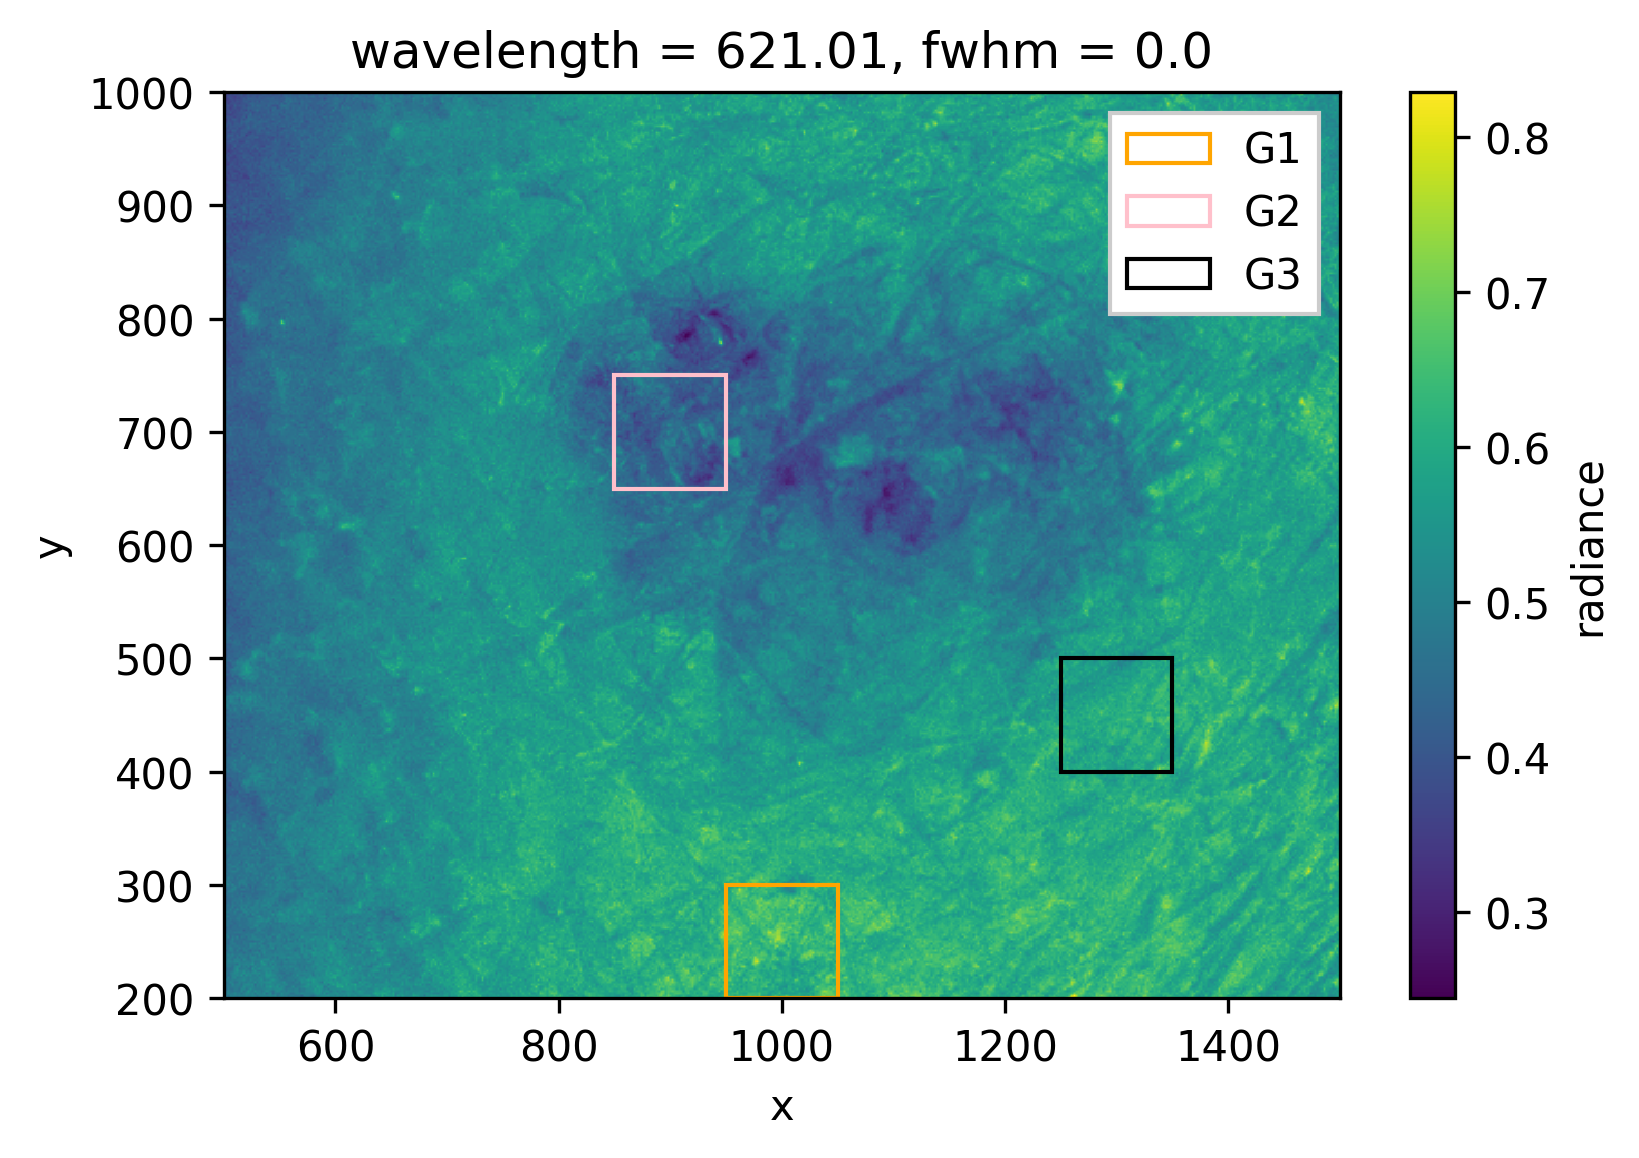

In [6]:
fig = plt.figure()
ax = fig.gca()

calibrated.sel(wavelength=620, method='nearest')[..., 200:1000, 500:1500].plot()

group1_xy = (950, 200)
group1_wh = (100, 100)
group1_fc = 'orange'
patch_group1 = patches.Rectangle(
    xy=group1_xy, 
    width=group1_wh[0], 
    height=group1_wh[1],
    color=group1_fc,
    label='G1',
    fill=False)
ax.add_patch(patch_group1)

group2_xy = (850, 650)
group2_wh = (100, 100)
group2_fc = 'pink'
patch_group2 = patches.Rectangle(
    xy=group2_xy, 
    width=group2_wh[0], 
    height=group2_wh[1],
    color=group2_fc,
    label='G2',
    fill=False)
ax.add_patch(patch_group2)

group3_xy = (1250, 400)
group3_wh = (100, 100)
group3_fc = 'black'
patch_group3 = patches.Rectangle(
    xy=group3_xy, 
    width=group3_wh[0], 
    height=group3_wh[1],
    color=group3_fc,
    label='G3',
    fill=False)
ax.add_patch(patch_group3)
ax.legend(fancybox=False, framealpha=1.0)

plt.show()

<Figure size 900x600 with 0 Axes>

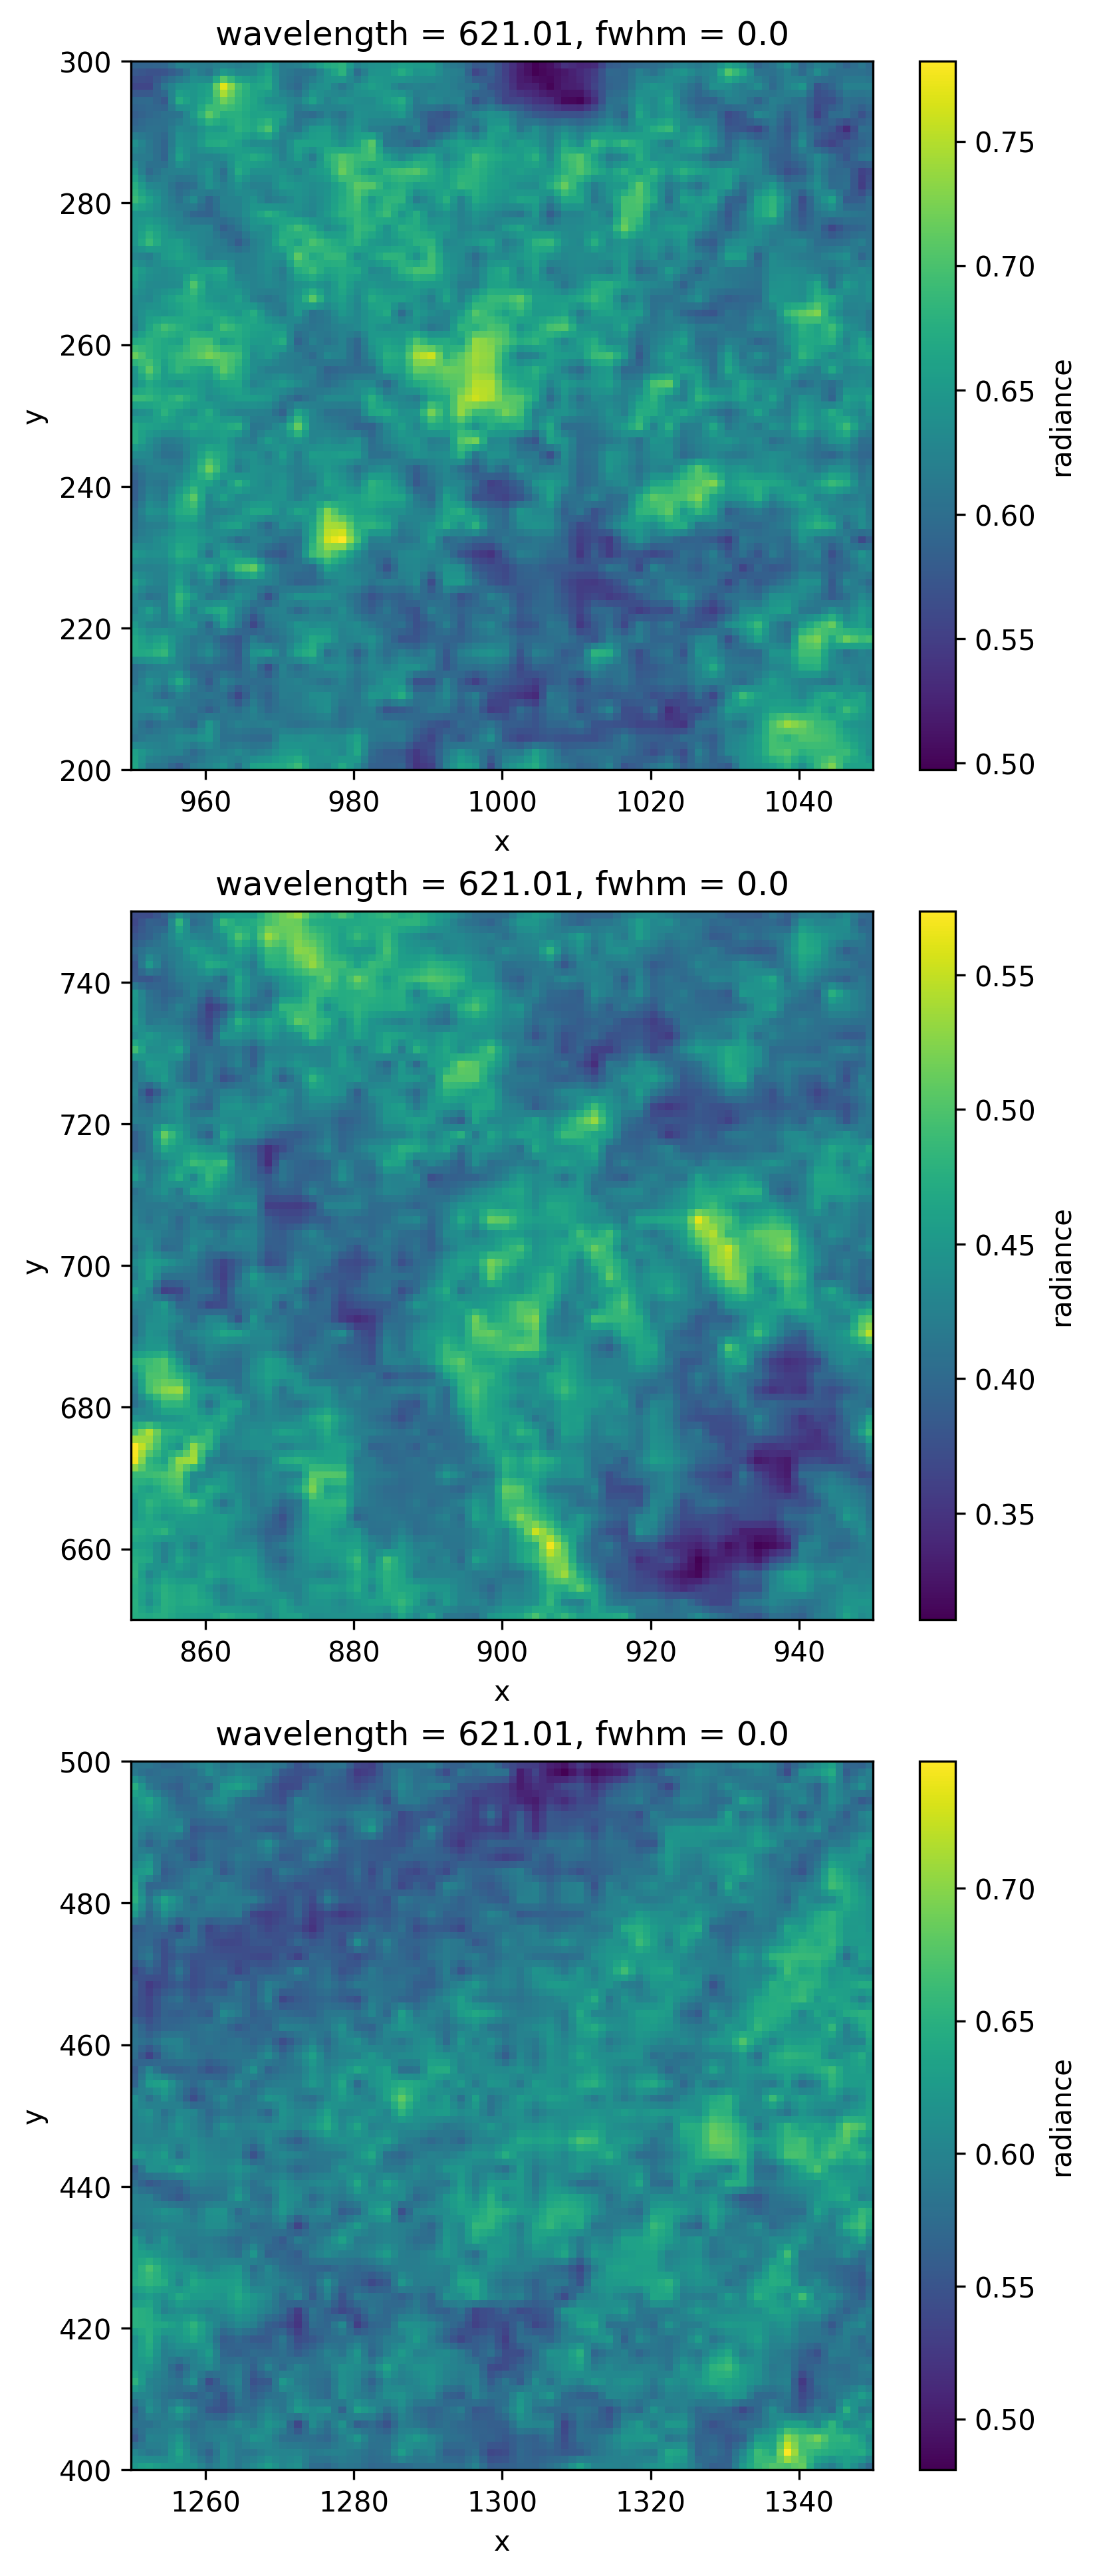

In [7]:
plt.figure()
fig, ax = plt.subplots(figsize=(6, 16), nrows=3)

group1 = calibrated[..., group1_xy[1]:group1_xy[1]+group1_wh[1], group1_xy[0]:group1_xy[0]+group1_wh[0]]
group1.sel(wavelength=620, method='nearest').plot(ax=ax[0])

group2 = calibrated[..., group2_xy[1]:group2_xy[1]+group2_wh[1], group2_xy[0]:group2_xy[0]+group2_wh[0]]
group2.sel(wavelength=620, method='nearest').plot(ax=ax[1])

group3 = calibrated[..., group3_xy[1]:group3_xy[1]+group3_wh[1], group3_xy[0]:group3_xy[0]+group3_wh[0]]
group3.sel(wavelength=620, method='nearest').plot(ax=ax[2])

plt.show()

In [8]:
wavelengths = calibrated.wavelength[0:100].values
# print(wavelengths)

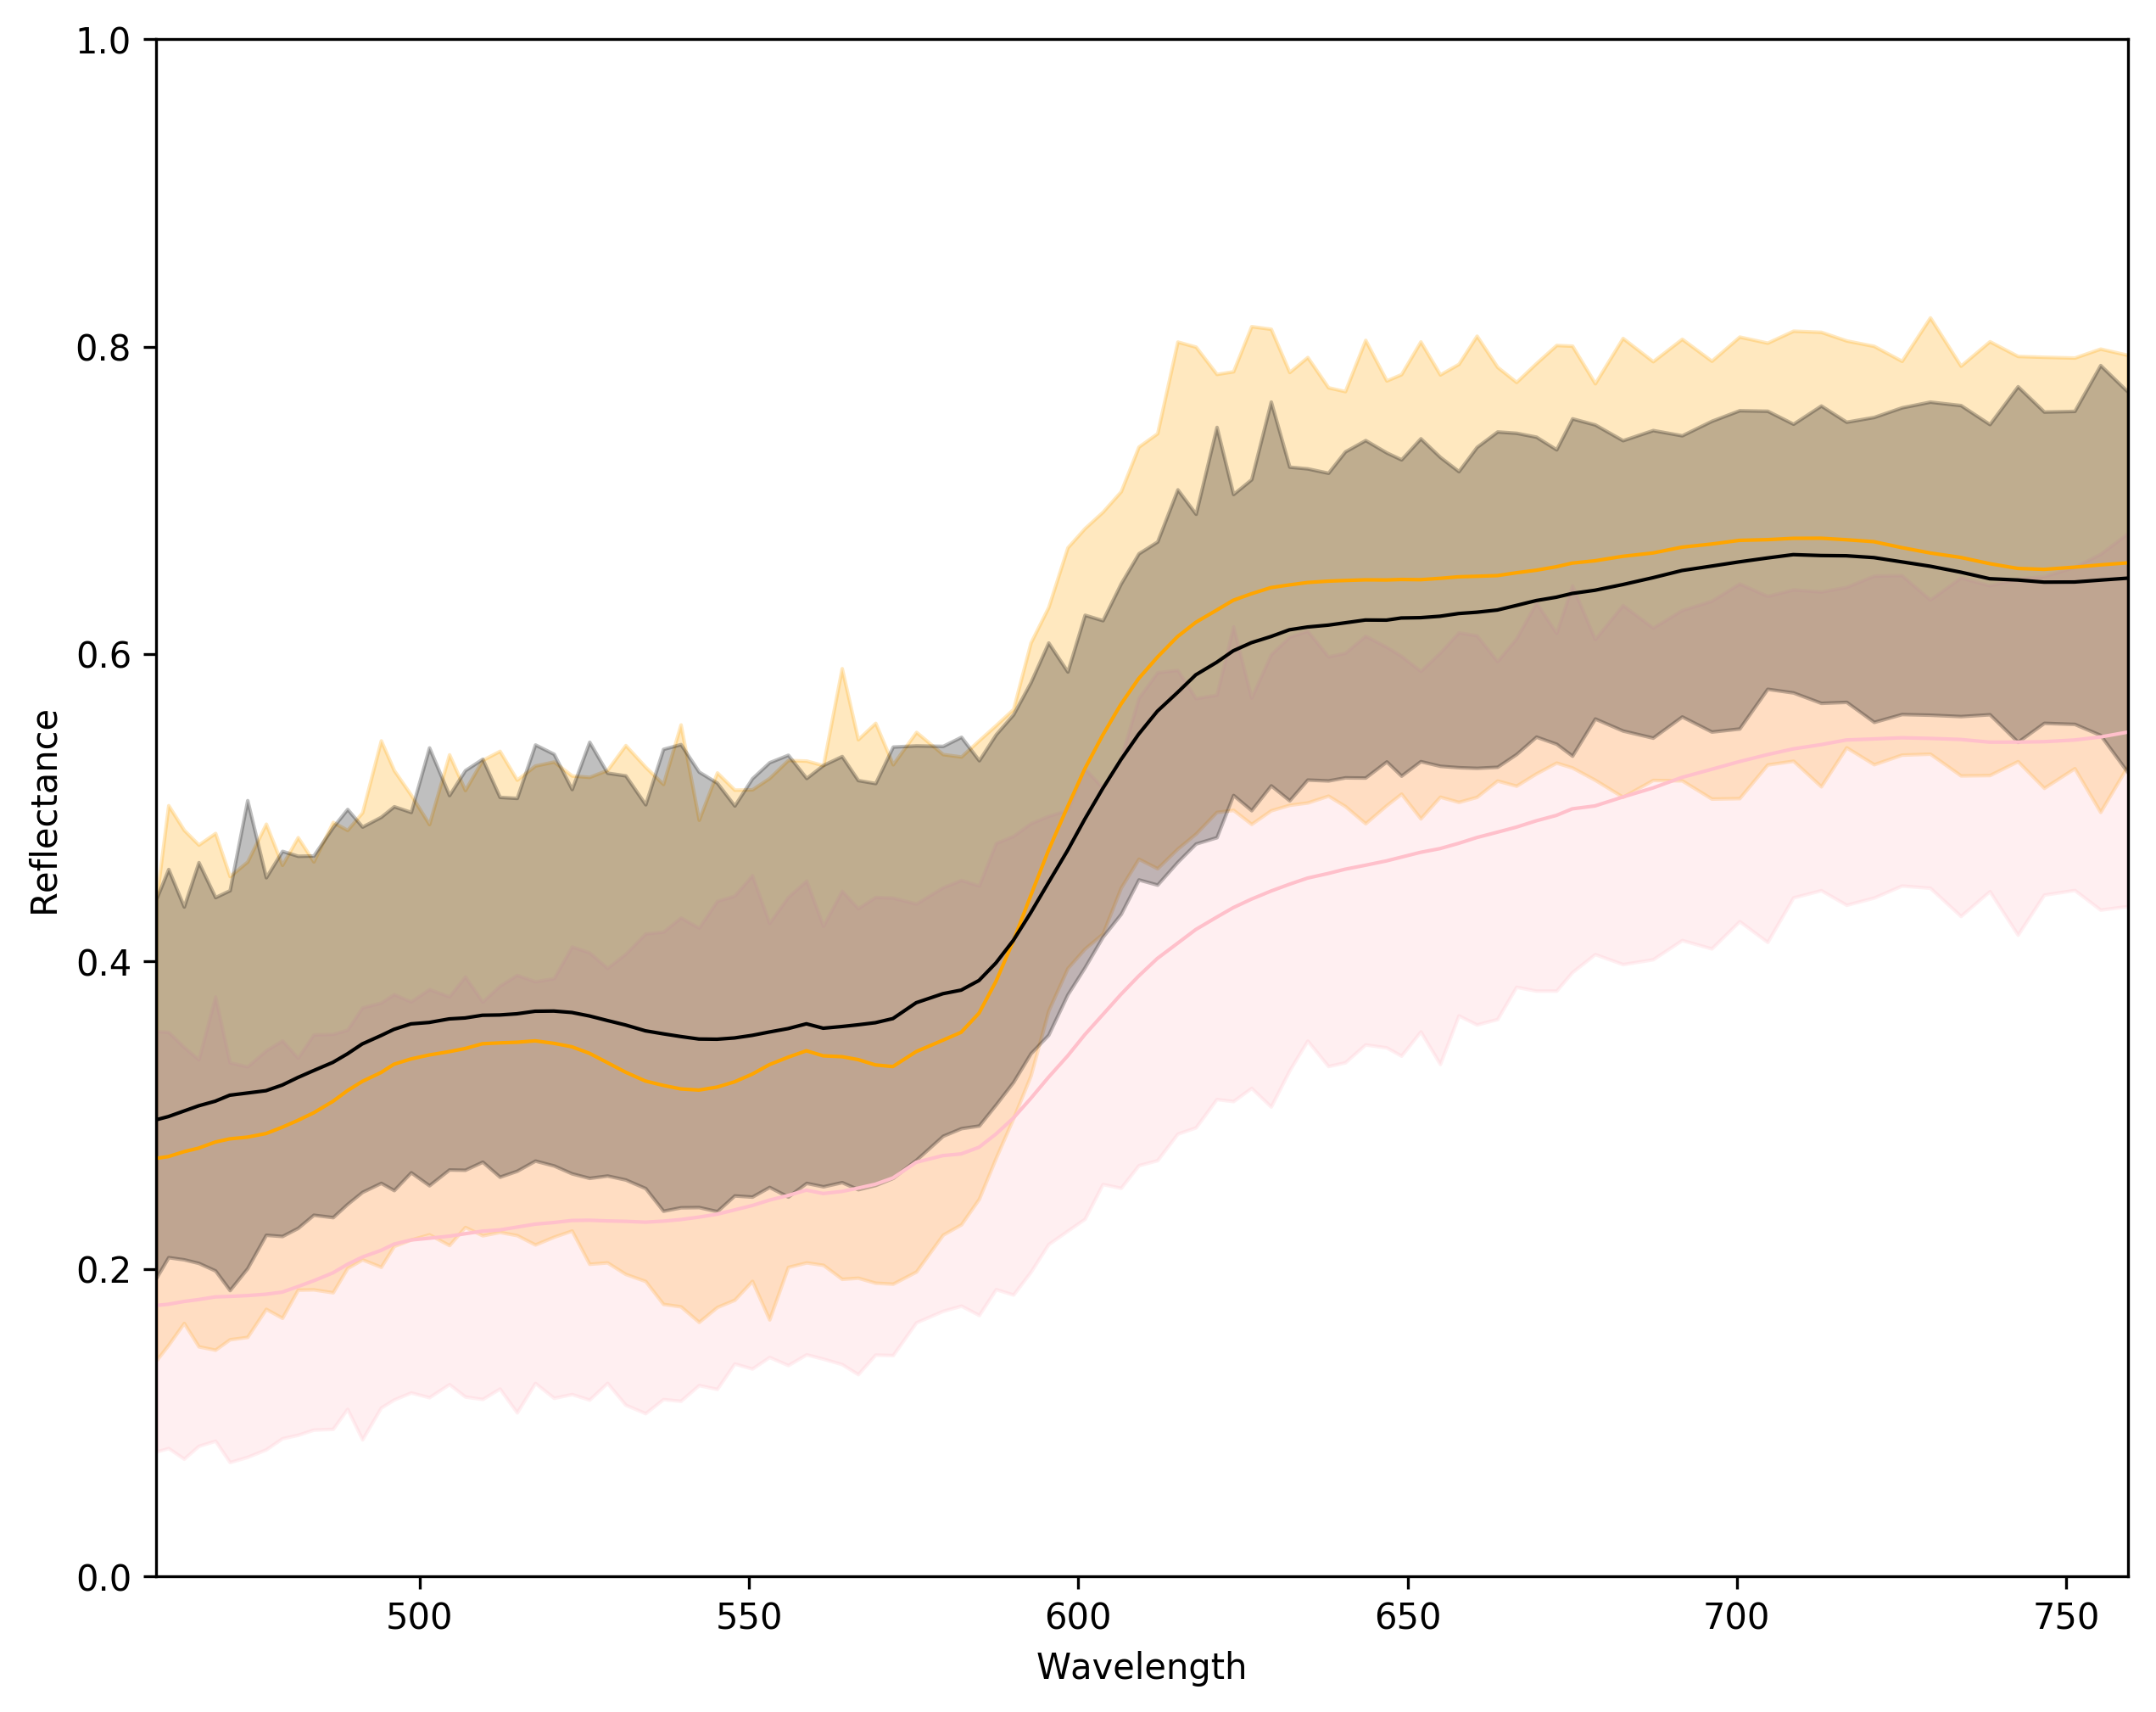

In [9]:
axis = (1, 2)

fig, ax = plt.subplots(1, figsize=(10, 8))

plt.xlabel('Wavelength')
plt.ylabel('Reflectance')
plt.xlim(wavelengths[0], wavelengths[-1])
plt.ylim(0.0, 1.0)

spectra_mean = group1.values[0:100].mean(axis=axis)
spectra_std = group1.values[0:100].std(axis=axis)
spectra_min = group1.values[0:100].min(axis=axis)
spectra_max = group1.values[0:100].max(axis=axis)
lines, = ax.plot(wavelengths, spectra_mean, color=group1_fc, lw=1)
ax.fill_between(wavelengths, spectra_min, spectra_max, color=group1_fc, alpha=0.25)

spectra_mean = group2.values[0:100].mean(axis=axis)
spectra_std = group2.values[0:100].std(axis=axis)
spectra_min = group2.values[0:100].min(axis=axis)
spectra_max = group2.values[0:100].max(axis=axis)
lines, = ax.plot(wavelengths, spectra_mean, color=group2_fc, lw=1)
ax.fill_between(wavelengths, spectra_min, spectra_max, color=group2_fc, alpha=0.25)

spectra_mean = group3.values[0:100].mean(axis=axis)
spectra_std = group3.values[0:100].std(axis=axis)
spectra_min = group3.values[0:100].min(axis=axis)
spectra_max = group3.values[0:100].max(axis=axis)
lines, = ax.plot(wavelengths, spectra_mean, color=group3_fc, lw=1)
ax.fill_between(wavelengths, spectra_min, spectra_max, color=group3_fc, alpha=0.25)

plt.show()